# **Churn Analysis**

## The churn rate is the measure of the number of employees/customers who left a company during a given period or the measure of lost revenue due to the departures.

## It's important for the company to retain the employess/customers once that's cheaper than hiring new members or attracting new clients. As so, understanding the churn rate can help the growth of the company.

## This project aimed to test a few classification models to predict if customers of a bank will stay or not with the company.


In [1]:
#Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import statistics  as sts
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
scaler = MinMaxScaler()
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score

from imblearn.over_sampling  import RandomOverSampler


In [2]:
#Reading the database

df = pd.read_csv("/content/Churn_Modelling.csv", sep=",")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#checking data info and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## First, let's make an exploratory data analysis and check how the variables relate to the response variable - Exited (if the customer left the company or not)

In [4]:
#checking for duplicated data
df.duplicated().sum()

0

In [5]:
#checking missing data
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#Checking values of our response variable
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
#Droping variables that don't give information for our analysis
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

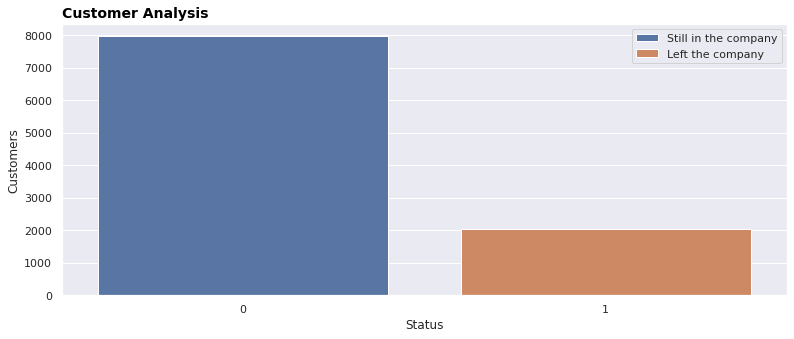

In [8]:
#Verifying churn entries
plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.countplot(x='Exited', hue='Exited', dodge=False, data=df)
churn_analysis.set_title('Customer Analysis', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Status")
plt.ylabel("Customers")
plt.legend(title='', loc='upper right', labels=['Still in the company', 'Left the company'])

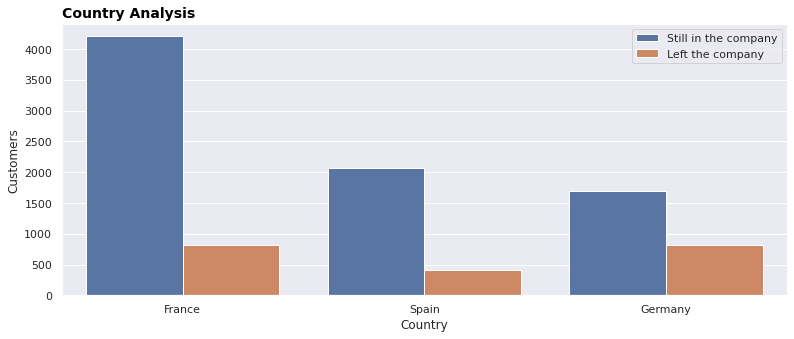

In [9]:
#Verifying churn in each country

plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.countplot(x='Geography', hue='Exited', data=df)
churn_analysis.set_title('Country Analysis', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Country")
plt.ylabel("Customers")
plt.legend(title='', loc='upper right', labels=['Still in the company', 'Left the company'])

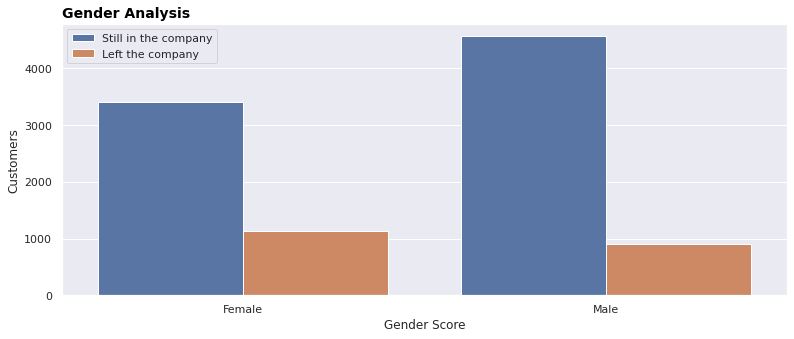

In [10]:
#Verifying churn per gender
plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.countplot(x='Gender', hue='Exited', data=df)
churn_analysis.set_title('Gender Analysis', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Gender Score")
plt.ylabel("Customers")
plt.legend(title='', loc='upper left', labels=['Still in the company', 'Left the company'])

In [11]:
df['IsActiveMember'] = df['IsActiveMember'].map({1: 'Active', 0: 'Inactive'})
df['HasCrCard'] = df['HasCrCard'].map({1: 'Yes', 0: 'No'})

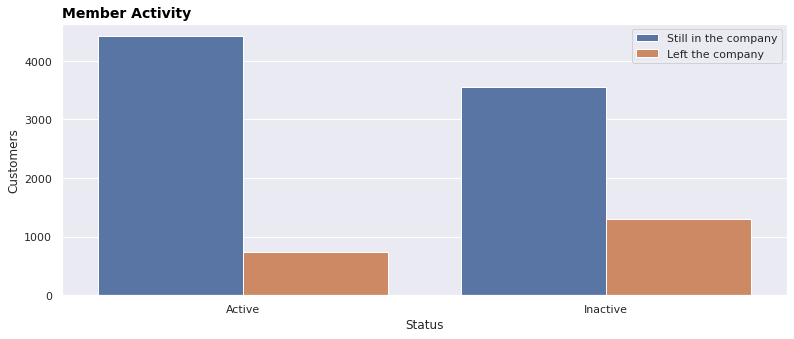

In [12]:
plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.countplot(x='IsActiveMember', hue='Exited', data=df)
churn_analysis.set_title('Member Activity', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Status")
plt.ylabel("Customers")
plt.legend(title='', loc='upper right', labels=['Still in the company', 'Left the company'])

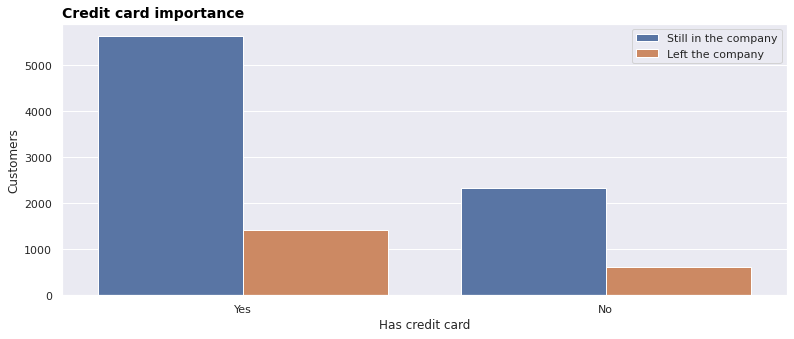

In [13]:
plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.countplot(x='HasCrCard', hue='Exited', data=df)
churn_analysis.set_title('Credit card importance', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Has credit card")
plt.ylabel("Customers")
plt.legend(title='', loc='upper right', labels=['Still in the company', 'Left the company'])

In [14]:
df['IsActiveMember'] = df['IsActiveMember'].map({'Active':1, 'Inactive':0})
df['HasCrCard'] = df['HasCrCard'].map({'Yes':1, 'No':0})

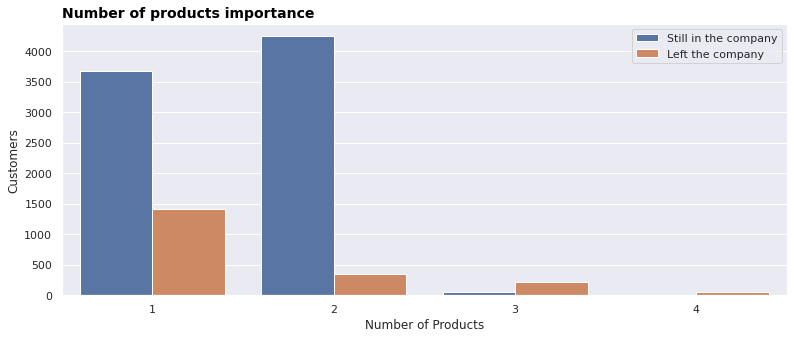

In [15]:
#Analysing if the number of products owned affect the churn rate 
plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.countplot(x='NumOfProducts', hue='Exited', data=df)
churn_analysis.set_title('Number of products importance', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Number of Products")
plt.ylabel("Customers")
plt.legend(title='', loc='upper right', labels=['Still in the company', 'Left the company'])

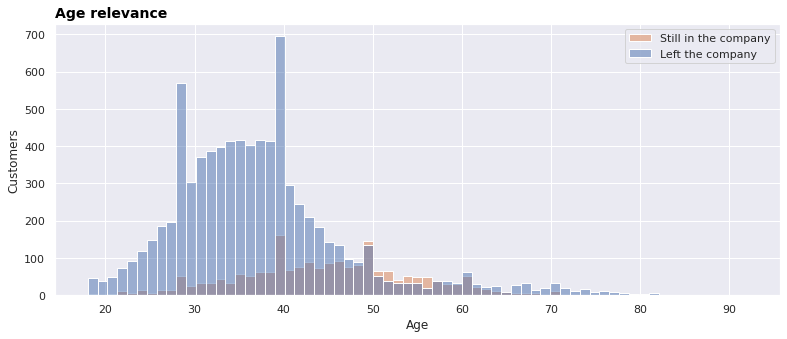

In [16]:
#Analysing if the number of products owned affect the churn rate 
plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.histplot(x='Age', hue='Exited', data=df);
churn_analysis.set_title('Age relevance', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Age")
plt.ylabel("Customers")
plt.legend(title='', loc='upper right', labels=['Still in the company', 'Left the company'])

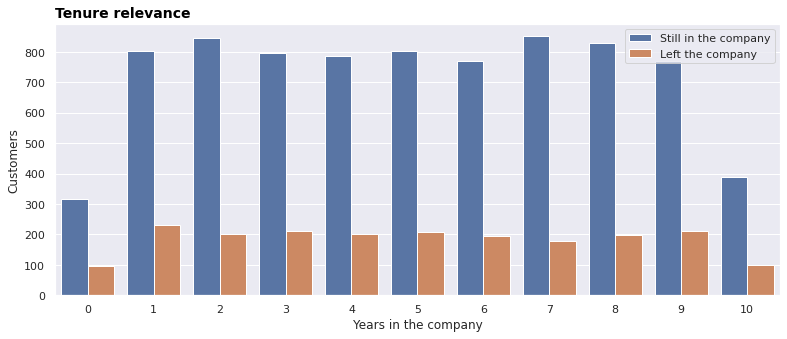

In [17]:
#Analysing if time in the company affect the churn rate 
plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.countplot(x='Tenure', hue='Exited', data=df)
churn_analysis.set_title('Tenure relevance', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Years in the company")
plt.ylabel("Customers")
plt.legend(title='', loc='upper right', labels=['Still in the company', 'Left the company'])

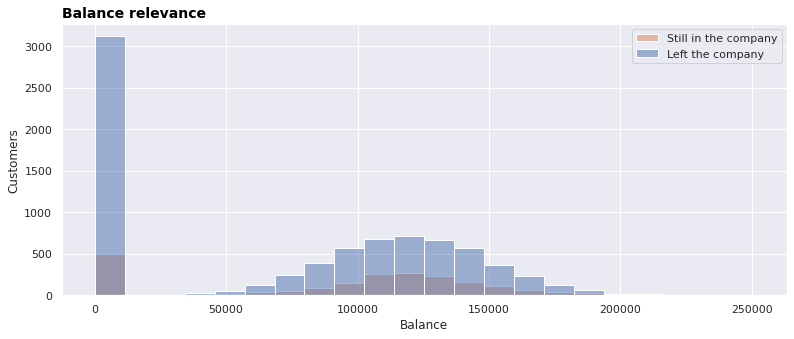

In [18]:
#Analysing balance relevance to churn rate
plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.histplot(x='Balance', hue='Exited', data=df)
churn_analysis.set_title('Balance relevance', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Balance")
plt.ylabel("Customers")
plt.legend(title='', loc='upper right', labels=['Still in the company', 'Left the company'])

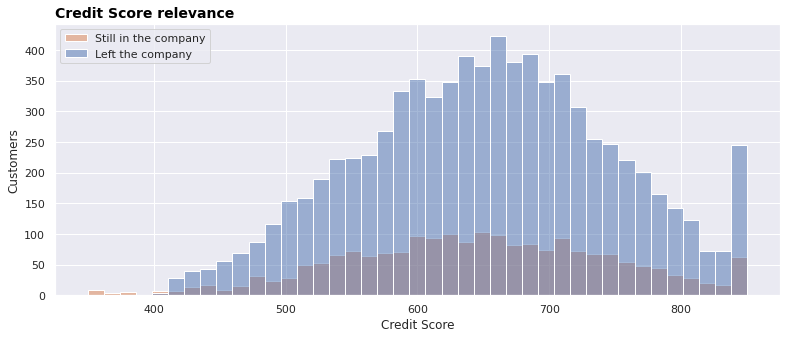

In [19]:
#Analysing Score relevance to churn rate
plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.histplot(x='CreditScore', hue='Exited', data=df)
churn_analysis.set_title('Credit Score relevance', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Credit Score")
plt.ylabel("Customers")
plt.legend(title='', loc='upper left', labels=['Still in the company', 'Left the company'])

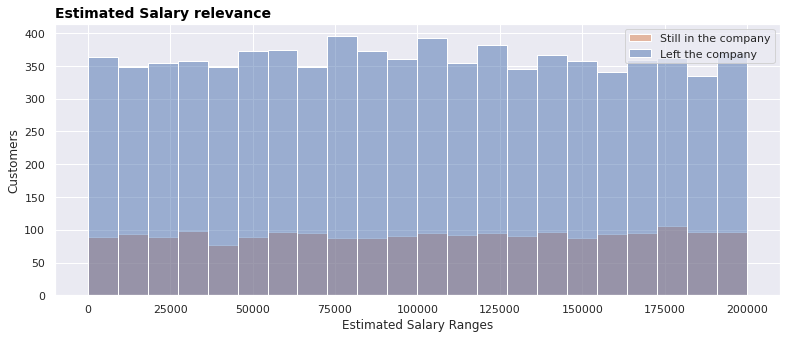

In [20]:
#Analysing salary ranges relevance to churn rate
plt.figure(figsize=(13,5))
sns.set(style="darkgrid")
churn_analysis = sns.histplot(x='EstimatedSalary', hue='Exited', data=df)
churn_analysis.set_title('Estimated Salary relevance', loc = 'left', fontsize=14, fontweight='bold', color='black')
plt.xlabel("Estimated Salary Ranges")
plt.ylabel("Customers")
plt.legend(title='', loc='upper right', labels=['Still in the company', 'Left the company'])

In [21]:
#Transforming categorical variables into binary ones to check their correlation with the response variable

dummy_var = ['Geography', 'Gender']

df = pd.get_dummies(df, columns = dummy_var, drop_first = True)

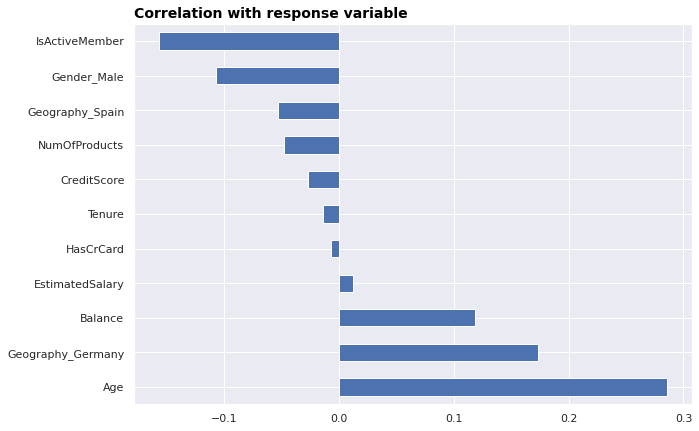

In [22]:
#Correlation with churn variable
plt.figure(figsize=(10,7))
plt.title("Correlation with response variable", loc = 'left', fontsize=14, fontweight='bold', color='black')
df.corr()['Exited'].sort_values(ascending=False).drop('Exited').plot(kind='barh')
plt.grid(True)
plt.show()

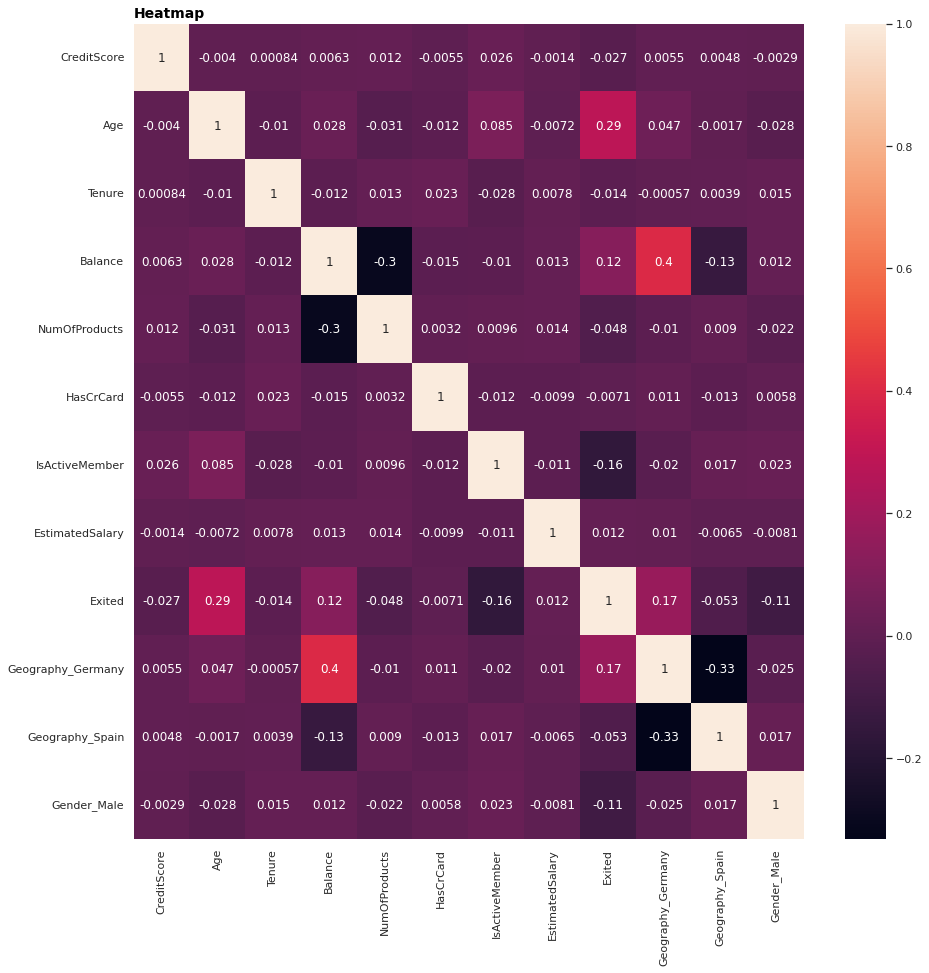

In [23]:
#Heatmap
plt.figure(figsize=(15,15))
plt.title("Heatmap", loc = 'left', fontsize=14, fontweight='bold', color='black')
sns.heatmap(df.corr(),annot=True)

In [24]:
#Droping some variables with very weak correlation
df = df.drop(['HasCrCard','CreditScore','EstimatedSalary','Geography_Spain'], axis = 1)
df.head()

,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited,Geography_Germany,Gender_Male
0,42,2,0.00,1,1,1,0,0
1,41,1,83807.86,1,1,0,0,0
2,42,8,159660.80,3,0,1,0,0
3,39,1,0.00,2,0,0,0,0
4,43,2,125510.82,1,1,0,0,0


### In the next step we need to prepare the data - transforming some variables and re-scaling others.

In [25]:
def aux_prod(x):
    if x == 1:
        return '1'
    elif x==2:
        return '2'
    else:
        return '3+'

df['NumOfProducts'] = df['NumOfProducts'].apply(aux_prod)

In [26]:
def aux_tenure(x):
    if x == 0:
        return '0'
    elif x <= 3:
        return '1-3'
    elif x <= 6:
        return '4-6'
    elif x <= 9:
        return '7-9'
    else:
        return '10'

df['Tenure'] = df['Tenure'].apply(aux_tenure)

In [27]:
def aux_balance(x):
    if x == 0:
        return '0'
    elif x < 100000:
        return '1 - 100k'
    elif x < 120000:
        return '100k - 120k'
    elif x < 140000:
        return '120k - 140k'
    else:
        return '140k+'

df['Balance'] = df['Balance'].apply(aux_balance)

In [28]:
dummy_var = ['Tenure','Balance', 'NumOfProducts']

df = pd.get_dummies(df, columns = dummy_var, drop_first = True)

In [29]:
df.head()

,Age,IsActiveMember,Exited,Geography_Germany,Gender_Male,Tenure_1-3,Tenure_10,Tenure_4-6,Tenure_7-9,Balance_1 - 100k,Balance_100k - 120k,Balance_120k - 140k,Balance_140k+,NumOfProducts_2,NumOfProducts_3+
0,42,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,41,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,42,0,1,0,0,0,0,0,1,0,0,0,1,0,1
3,39,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,43,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [30]:
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1,1))

## In this analysis we are testing the following classification models - Bagging Classifier, Random Forest, Gradient Boosting and Logistic Regression.

## We will check the metrics for each of the models and see which one can predict with the highest accuracy if the customer will stay or not in the company.

In [31]:
X = df.drop(['Exited'], axis=1)
y = df['Exited'].values.reshape(-1,1)
X.shape

(10000, 14)

In [32]:
#Balancing the response variable
smoteOver = RandomOverSampler(sampling_strategy=1)
X, y = smoteOver.fit_resample(X,y)

In [33]:
#Splitting the data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

ROC AUC Bagging: 88.88 %
ROC AUC Random Forest: 79.74 %
ROC AUC Gradient Boosting: 86.19 %
ROC AUC Logistic Regression: 76.29 %


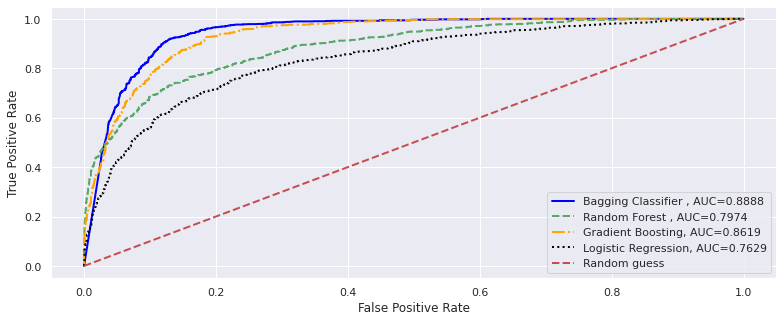

In [34]:
#Training the models and plotting their roc curves, also collecting the metrics into a pandas dataframe
plt.figure(figsize=(13,5)).clf()
results = ['Accuracy (%)', 'Recall (%)', 'Precision (%)', 'Balanced Acc. (%)', 'F1-Score (%)', 'ROC AUC Score (%)']
results0 = {}

#Bagging Classifier
model_bagging = BaggingClassifier(n_estimators=50, base_estimator = DecisionTreeClassifier())
model_bagging.fit(X_train, y_train)
y_pred_bagging=model_bagging.predict(X_test)


acc = accuracy_score(y_test, y_pred_bagging)
f1 = f1_score(y_test, y_pred_bagging)
recall = recall_score(y_test, y_pred_bagging)
precision = precision_score(y_test, y_pred_bagging)
balanced_Acc = balanced_accuracy_score(y_test, y_pred_bagging)


print('ROC AUC Bagging: %.2f' % (roc_auc_score(y_test, y_pred_bagging)*100),'%')


y_probs = model_bagging.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = round(roc_auc_score(y_test, y_pred_bagging), 4)
plt.plot(fpr, tpr, lw=2, color='blue', label="Bagging Classifier , AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

results0['Bagging Classifier'] = [round(acc*100,2), round(recall*100,2), round(precision*100,2), round(balanced_Acc*100,2), round(f1*100,2), auc*100]



#Random Forest
model_rf = RandomForestClassifier(bootstrap=True, max_depth=8, max_features=4, min_samples_leaf=5, min_samples_split=5)
model_rf.fit(X_train, y_train)


y_pred_rf=model_rf.predict(X_test)


acc = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
balanced_Acc = balanced_accuracy_score(y_test, y_pred_rf)




print('ROC AUC Random Forest: %.2f' % (roc_auc_score(y_test, y_pred_rf)*100),'%')



y_probs = model_rf.predict_proba(X_test)[:,1]
auc = round(roc_auc_score(y_test, y_pred_rf), 4)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, linestyle='--', lw=2, color='g', label="Random Forest , AUC="+str(auc))

results0['Random Forest'] = [round(acc*100,2), round(recall*100,2), round(precision*100,2), round(balanced_Acc*100,2), round(f1*100,2),  auc*100]

#Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(learning_rate=0.7, max_depth=5, n_estimators = 200, max_features = 8, random_state = 42)
model_gb.fit(X_train, y_train)
y_pred_gb=model_gb.predict(X_test)


acc = accuracy_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
balanced_Acc = balanced_accuracy_score(y_test, y_pred_gb)



print('ROC AUC Gradient Boosting: %.2f' % (roc_auc_score(y_test, y_pred_gb)*100),'%')


y_probs = model_gb.predict_proba(X_test)[:,1]
auc = round(roc_auc_score(y_test, y_pred_gb), 4)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, linestyle='-.', lw=2, color='orange', label="Gradient Boosting, AUC="+str(auc))

results0['Gradient Boosting'] = [round(acc*100,2), round(recall*100,2), round(precision*100,2), round(balanced_Acc*100,2), round(f1*100,2), auc*100]


#Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr=model_lr.predict(X_test)


acc = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
balanced_Acc = balanced_accuracy_score(y_test, y_pred_lr)



print('ROC AUC Logistic Regression: %.2f' % (roc_auc_score(y_test, y_pred_lr)*100),'%')


y_probs = model_lr.predict_proba(X_test)[:,1]
auc = round(roc_auc_score(y_test, y_pred_lr), 4)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, linestyle='dotted', lw=2, color='black', label="Logistic Regression, AUC="+str(auc))

results0['Logistic Regression'] = [round(acc*100,2), round(recall*100,2), round(precision*100,2), round(balanced_Acc*100,2), round(f1*100,2), auc*100]



plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.legend()


#Converting all the metrics collected into a dataframe
Model_comp = pd.DataFrame(results0, index = results).T


In [35]:
#Checking the metrics
Model_comp

,Accuracy (%),Recall (%),Precision (%),Balanced Acc. (%),F1-Score (%),ROC AUC Score (%)
Bagging Classifier,88.73,94.78,84.11,88.88,89.13,88.88
Random Forest,79.79,77.85,80.12,79.74,78.97,79.74
Gradient Boosting,86.10,90.08,82.88,86.19,86.33,86.19
Logistic Regression,76.30,75.98,75.54,76.29,75.76,76.29


[[1355  278]
 [  81 1472]]
True Negatives:  1355
False Positives:  278
False Negatives:  81
True Positives:  1472


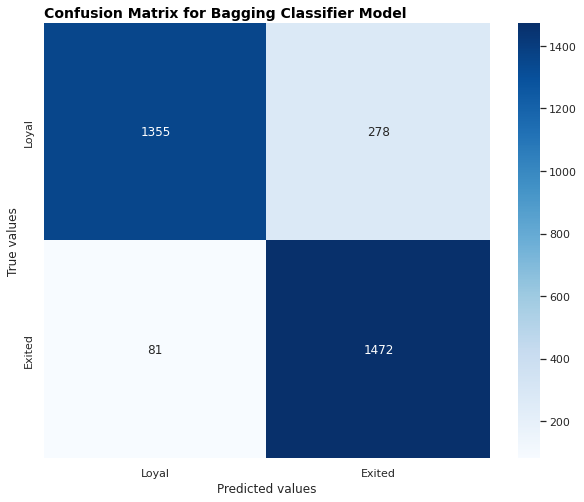

In [40]:
#Confusion matrix - Bagging model
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
print(cm_bagging)
tn, fp, fn, tp = cm_bagging.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
plt.figure(figsize=(10,8))
sns.heatmap(cm_bagging, cmap='Blues',fmt="d", annot=True, xticklabels=['Loyal', 'Exited'], yticklabels=['Loyal', 'Exited'])
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix for Bagging Classifier Model', loc='Left', fontsize=14, fontweight='bold', color='black')
plt.show()

[[1333  300]
 [ 344 1209]]
True Negatives:  1333
False Positives:  300
False Negatives:  344
True Positives:  1209


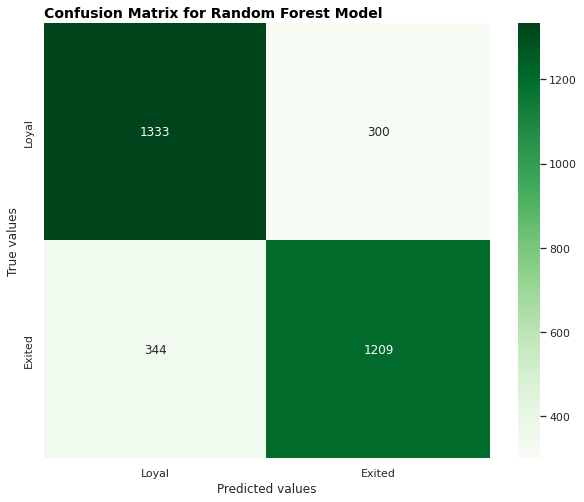

In [41]:
#Confusion matrix - Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
plt.figure(figsize=(10,8))
sns.heatmap(cm_rf, cmap='Greens',fmt="d", annot=True, xticklabels=['Loyal', 'Exited'], yticklabels=['Loyal', 'Exited'])
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix for Random Forest Model', loc='Left', fontsize=14, fontweight='bold', color='black')
plt.show()

[[1344  289]
 [ 154 1399]]
True Negatives:  1344
False Positives:  289
False Negatives:  154
True Positives:  1399


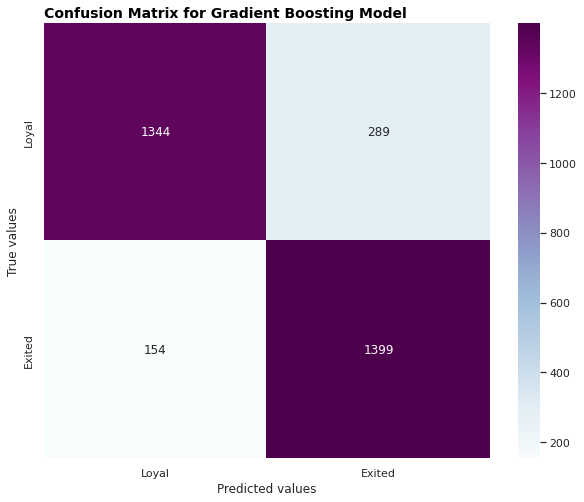

In [42]:
#Confusion matrix - Gradient Boosting model
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)
tn, fp, fn, tp = cm_gb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
plt.figure(figsize=(10,8))
sns.heatmap(cm_gb, cmap='BuPu',fmt="d", annot=True, xticklabels=['Loyal', 'Exited'], yticklabels=['Loyal', 'Exited'])
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix for Gradient Boosting Model', loc='Left', fontsize=14, fontweight='bold', color='black')
plt.show()

[[1251  382]
 [ 373 1180]]
True Negatives:  1251
False Positives:  382
False Negatives:  373
True Positives:  1180


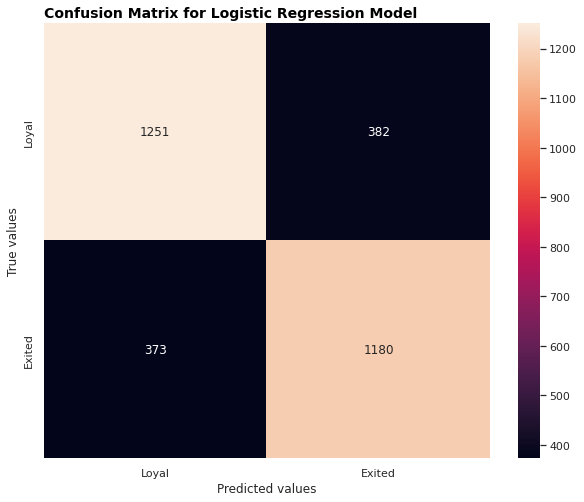

In [43]:
#Confusion matrix - Logistic Regression model

cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
tn, fp, fn, tp = cm_lr.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
plt.figure(figsize=(10,8))
sns.heatmap(cm_lr, cmap='rocket',fmt="d", annot=True, xticklabels=['Loyal', 'Exited'], yticklabels=['Loyal', 'Exited'])
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix for Logistic Regression Model', loc='Left', fontsize=14, fontweight='bold', color='black')
plt.show()

### After checking our results, the best model in this analysis was the Bagging Classifier model with an Accuracy of 88.73%.
### This model also had the highest percentage in all the metrics considered - Recall, Precision, Balanced Accuracy, F1-Score and ROC AUC Score.